# TP de statistique inférentielle
> #### A propos de jupyter notebook.
C'est un espace qui permet de mélanger du texte (même latex), code etc. 
Pour executer une cellule tapez Enter. Pour inserer une nouvelle cellule à un endroit, ou changer le type d'une cellule existante vous pouvez utiliser le menu en haut.
Par exemple ceci est une cellule dite "Markdown" pour du texte.
En bas vous allez voir des celules type "code" ou on peut executer du code (Python3 ici).
On encourage à se documenter sur internet (https://jupyter-notebook.readthedocs.io/en/stable/ site officiel par exemple) ou un grand nombre de tutoriels et réponses aux questions sont présents.

 #### A propos des différents modules utilisés. 
 
On encourage fortement à se documenter sur internet pour des questions plus poussées (ou pas)
    
> **pandas**: est un module qui permet d'analyser et de manipuler les données. On verra en particulier l'objet dataframe qui permet de manipuler des tables de données.
 
>**matplotlib.pyplot**: est un module permettant d'afficher des graphiques.
    seaborn: un module qui permet de visualiser les données. Souvent, quand on sait le manipuler, ça donne des résultats "plus beaux" que matplotlib.pyplot

>**numpy**: Un package de calcul scientifique

>**scipy.stats**: Un module qui contient un grand nombre d'outils statistiques: distribution, fonction de répartition, tests etc.

#### Consignes.
>   
Répondre à chaque question dans les cellules que vous créerez après la question correspondante.
La note prendra compte de la présentation et de la clareté des réponses.
 
>Envoyez le tp sur le mail
sholom.schechtman@telecom-sudparis.eu. Avec comme sujet: **TP1_NOM_PRENOM**. C'est **important** pour que votre tp ne se perde pas et soit **noté**.

**On importe les packages nécessaires**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import seaborn as sns
%matplotlib inline

# Exercice 1. pandas et manipulations de données

> ### 1. 
Créez un dictionnaire, representant nos données: `data = {"nom": ["tutu", "toto", "titi"],
       "sexe": ["M", "M", "F"],
       "taille": [1.56, 1.82, 1.70], 
       'naissance": ["11/12/82", "21/12/82", "25/12/83"]}`
       
> Utilisez la commande `df = pd.DataFrame(data)` pour importer les données dans un Dataframe de nom df


In [2]:
data = {"nom": ["tutu", "toto", "titi"],
       "sexe": ["M", "M", "F"],
       "taille": [1.56, 1.82, 1.70], 
       "naissance": ["11/12/82", "21/12/82", "25/12/83"]}

# On créé le dataframe à partir du data
df = pd.DataFrame(data)

> ### 2. 
Testez et décrivez le fonctionnement des commandes `df.head()`, `df.head(0)`, `df.head(1)`, `df.head(2)`. 

In [3]:
df.head()

,nom,sexe,taille,naissance
0,tutu,M,1.56,11/12/82
1,toto,M,1.82,21/12/82
2,titi,F,1.70,25/12/83


In [4]:
df.head(0)

,nom,sexe,taille,naissance


In [5]:
df.head(1)

,nom,sexe,taille,naissance
0,tutu,M,1.56,11/12/82


In [6]:
df.head(2)

,nom,sexe,taille,naissance
0,tutu,M,1.56,11/12/82
1,toto,M,1.82,21/12/82


### Analyse

A partir de nos test on peut en déduire que :

- `df.head()` : affiche les premières lignes du tableau (d'après la doc, par défaut les 5 premières)
- `df.head(n=0)` : affiche la "première" ligne, en fait, le nom des colones
- `df.head(n=1)` : affiche la première ligne de data
- `df.head(n=2)` : affiche les deux premières ligne de data


> ### 3. 
Qu'est ce qui se passe si on remplace head par tail dans la question précédente? 


In [7]:
df.tail(n=1)

,nom,sexe,taille,naissance
2,titi,F,1.7,25/12/83


### Analyse

On obtient le même comportement mais au lieu de commencer par le début du tableau on commence par la fin, on affichera donc la dernière ligne, les deux dernières... etc, n=x on affiche x lignes en partant de la fin.

> ### 4.
Décrivez le fonctionnement de la commande `df.sort_values`: prenez un argument "taille" et testez deux valeurs `ascending= True` et `ascending = False`

In [8]:
df.sort_values("taille", ascending=True)

,nom,sexe,taille,naissance
0,tutu,M,1.56,11/12/82
2,titi,F,1.70,25/12/83
1,toto,M,1.82,21/12/82


In [9]:
df.sort_values("taille", ascending=False)

,nom,sexe,taille,naissance
1,toto,M,1.82,21/12/82
2,titi,F,1.70,25/12/83
0,tutu,M,1.56,11/12/82


### Analyse

On classe dans l'odre croissant vers le bas (`ascending=True`) selon la colone `taille` ou dans l'odre décroissant vers le bas (`ascending=False`) selon la colone `taille`



> ### 5.
    
> Testez et décrivez la commande `df["var"] = [1 if x > 1.6 else 0 for x in df["taille"]`?

In [10]:
df["var"] = [1 if x > 1.6 else 0 for x in df["taille"]]

In [11]:
df

,nom,sexe,taille,naissance,var
0,tutu,M,1.56,11/12/82,0
1,toto,M,1.82,21/12/82,1
2,titi,F,1.70,25/12/83,1


### Analyse

Avec cette commande on créer une nouvelle colone `var` qui va être initialisé avec une colone de 1 ou 0 en fonction de la valeur dans la colone taille (1 si taille > 1.6 et 0 sinon)

>### 6. 
Supprimez la colonne "var" avec la commande `df.drop` (voir documentation et mettez axis=1 en argument)

In [12]:
df = df.drop(columns=["var"], axis=1)

>### 7.   
Testez la commande `df.loc[df["sexe"] == "M"]`.
Testez la commande `df.loc[df["sexe"] == "M", "taille"]`.

In [13]:
df.loc[df["sexe"] == "M"]

,nom,sexe,taille,naissance
0,tutu,M,1.56,11/12/82
1,toto,M,1.82,21/12/82


In [14]:
df.loc[df["sexe"] == "M", "taille"]

0    1.56
1    1.82
Name: taille, dtype: float64

>### 7.


On suppose que le poids d'un homme est poids = (tailleencm)/2 - 10
et le poids d'une femme est poids = (tailleencm)/2 - 15

>A l'aide des questions précédentes completez la colonne poids.

In [15]:
df["poids"] = 0.0
df.loc[df["sexe"] == "M", "poids"] = df.loc[df["sexe"] == "M", "taille"]*100 / 2 - 10
df.loc[df["sexe"] == "F", "poids"] = df.loc[df["sexe"] == "F", "taille"]*100 / 2 - 15

In [16]:
df

,nom,sexe,taille,naissance,poids
0,tutu,M,1.56,11/12/82,68.0
1,toto,M,1.82,21/12/82,81.0
2,titi,F,1.70,25/12/83,70.0


> ### 6. 
Que fait la commande `df["taille"].mean()`?
Faites apparaître le poids moyen des données

In [17]:
df["taille"].mean()

1.6933333333333334

La commande `df["taille"].mean()` donne la moyenne de la colone

In [18]:
df.mean(numeric_only=True)
# Attention, comme on ne peut faire la moyenne que des colones numérique, on ne considère pas les autres avec numeric_only=True

taille     1.693333
poids     73.000000
dtype: float64

> ### 7. 
Que fait la commande `df.loc[df["sexe"]=="M"]`?
Faites apparaître le poids moyen des hommes

In [19]:
df.loc[df["sexe"]=="M"]

,nom,sexe,taille,naissance,poids
0,tutu,M,1.56,11/12/82,68.0
1,toto,M,1.82,21/12/82,81.0


In [20]:
df.loc[df["sexe"]=="M"]["poids"].mean()

74.5

### Analyse

La commande `df.loc[df["sexe"]=="M"]`, extrait le sous dataframe ne contenant que les hommes. On peut alors prendre la colone `poids` et faire la moyenne.

> ### 8.
Faites apparaître le nom de la personne la plus légère.

In [21]:
indice_poids_min = df["poids"].min()
print("Personne la plus légère s'appelle : " + df.loc[df["poids"] == indice_poids_min]["nom"].values)


["Personne la plus légère s'appelle : tutu"]


# Exercice 2: Analyse d'un jeu de données bancaires

    Le jeu de données GermanCredit.data, disponible sur le site de l’ UCI repository, comporte desrenseignements
    sur 1000 clients d’une banque allemande, chaque client étant décrit par 20 variables.
    
    
> ### 1. 
Téléchargez le et importez le dans une DataFrame en utilisant la commande `german = pd.read_csv("nom.csv, sep = ' ', header=None)`

In [22]:
german = pd.read_csv("german.data", sep = ' ', header=None)

> ### 2.
Creez le dictionnaire `{1: "durée", 4:"montant"}` et utilisez le dans la commande `german.rename()` pour renommer les colonnes correspondantes.

In [23]:
dict = {1: "durée", 4: "montant"}
german.rename(mapper=dict, inplace=True, axis=1)

> ### 3.
Utilisez la commade `describe` de pandas pour obtenir des premières informations sur la durée et les montants du crédit

In [24]:
german[["durée", "montant"]].describe()

,durée,montant
count,1000.000000,1000.000000
mean,20.903000,3271.258000
std,12.058814,2822.736876
min,4.000000,250.000000
25%,12.000000,1365.500000
50%,18.000000,2319.500000
75%,24.000000,3972.250000
max,72.000000,18424.000000


> ### 4.
Utilisez la commande `german.boxplot()` pour créez une boite à moustache de la variable durée.
    Faire de même pour la variable montant.

<AxesSubplot:>

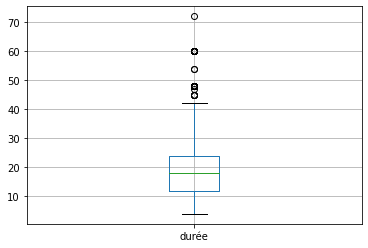

In [25]:
german.boxplot('durée')

<AxesSubplot:>

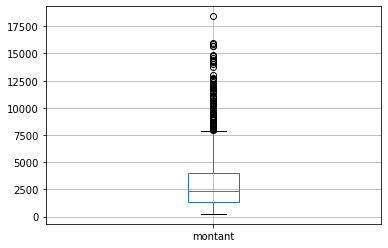

In [26]:
german.boxplot("montant")

> ### 5. 
Faire la question précedente en utilisant le module seaborn: `sns.boxplot`

<AxesSubplot:xlabel='durée'>

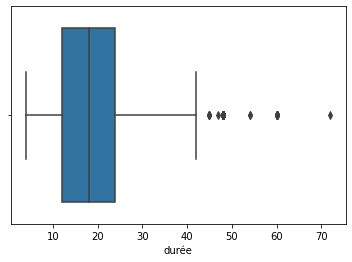

In [27]:
sns.boxplot(x=german["durée"])

<AxesSubplot:xlabel='montant'>

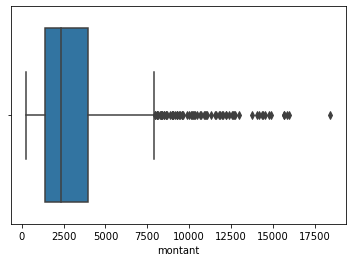

In [28]:
sns.boxplot(x=german["montant"])

> ### 7. 
Utilisez la commande `german.hist` pour tracer un histograme des variables durées et montant

array([[<AxesSubplot:title={'center':'montant'}>,
        <AxesSubplot:title={'center':'durée'}>]], dtype=object)

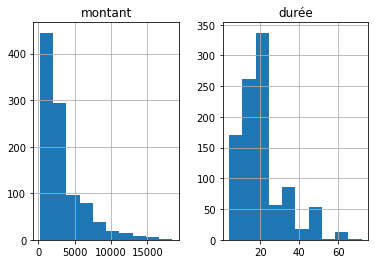

In [29]:
german.hist(["montant", "durée"])

> ### 8. 
Utilisez la commande `german.plot.scatter` pour tracer le scatter plot des variable "durée" et "montant"

<AxesSubplot:xlabel='durée', ylabel='montant'>

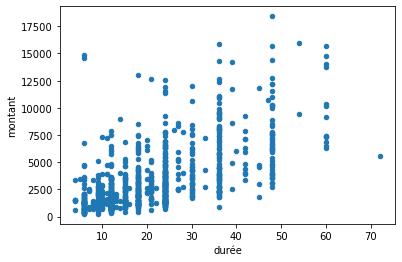

In [30]:
german.plot.scatter(x="durée", y="montant")

> ### 9.
Tracez la table de correlations entre "durée" et "montant" à l'aide de la commande `german[].corr()` (pensez à selectionner les bonnes colonnes).

In [31]:
german[["durée", "montant"]].corr()

,durée,montant
durée,1.000000,0.624984
montant,0.624984,1.000000


> ### 10.
Utilisez `stat.pearsonr` pour tester la correlation entre les deux variables. Que peut-on en conclure?

In [32]:
stat.pearsonr(x=german["durée"], y=german["montant"])

(0.6249841983009814, 1.8628512880508719e-109)

### Analyse question 10

On test ici l'hypothèse de "non corrélation entre x et y" donc ici `durée` et `montant`. On obtient une p-value très inférieure à 5%, on peut donc rejeter l'hypothèse de départ. Les deux valeurs sont donc corélées.

# Exercice 3: Simulation d'un jeu de données

>### 1. 
Quel est l'effet de la commande suivante?

````
for i in range(3):
    if i<2:
        print(i, ": ", np.random.rand())
    else:
        print(i, ": ", np.random.rand(2,3))
````

In [33]:
for i in range(3):
    if i<2:
        print(i, ": ", np.random.rand())
    else:
        print(i, ": ", np.random.rand(2,3))

0 :  0.6296503474643659
1 :  0.2952553992004312
2 :  [[0.1365585  0.58302958 0.1599055 ]
 [0.32117596 0.01415542 0.11563886]]


### Analyse question 3.1

Pour les ittérations 1 et 2 on génère pseudo-aléatoirement un nombre entre 0 et 1.
L'itération 3 va générer un tableau de taille `(2,3)` composé de nombres aléatoire entre 0 1.

>### 2. 
Commentez la différence avec la question précédente.
(essayez d'executer la cellule plusieurs fois de suite)

````
np.random.seed(0)
for i in range(3):
    if i<2:
        print(i, ": ", np.random.rand())
    else:
        print(i, ": ", np.random.rand(2,3))
````

In [34]:
np.random.seed(0)
for i in range(3):
    if i<2:
        print(i, ": ", np.random.rand())
    else:
        print(i, ": ", np.random.rand(2,3))

0 :  0.5488135039273248
1 :  0.7151893663724195
2 :  [[0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773  ]]


### Analyse question 3.2 :

Même résultat que la question 3.1 MAIS ici l'utilisation du seed donne un comportement différent. On obtient toujours les même nombres pseudo-aléatoires aléatoire. On en déduit que le seed permet la reproductibilité de nos expériences aléatoires.

> ### 3. 
Sauvegardez dans une variable "simul" un échantillon de 100 valeurs aléatoires, chacune tirée uniformément dans [0,1].

>Tracez son histogramme avec la commande plt.hist

In [35]:
simul = []
np.random.seed(3000)
for i in range (100):
    simul.append(np.random.rand())

(array([10., 10.,  6., 13.,  8., 11., 11.,  9.,  8., 14.]),
 array([0.00597717, 0.10509508, 0.20421299, 0.30333089, 0.4024488 ,
        0.5015667 , 0.60068461, 0.69980252, 0.79892042, 0.89803833,
        0.99715624]),
 <BarContainer object of 10 artists>)

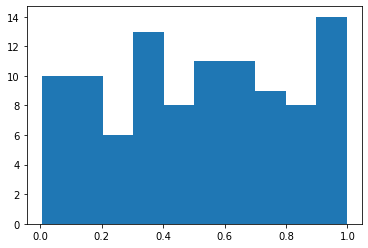

In [36]:
plt.hist(simul)


> ### 4. 
Dans les commandes précédentes remplacez `rand` par `randn` et `exponential`. Qu'est ce qui change?

(array([ 1.,  9., 10., 26., 17., 14., 13.,  8.,  1.,  1.]),
 array([-2.66554298, -2.07560077, -1.48565857, -0.89571637, -0.30577417,
         0.28416803,  0.87411023,  1.46405243,  2.05399463,  2.64393684,
         3.23387904]),
 <BarContainer object of 10 artists>)

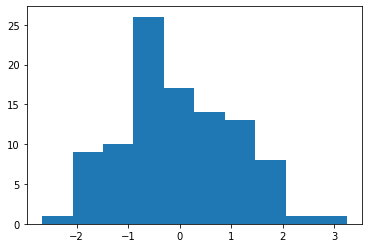

In [37]:
simul_randn = []
for i in range (100):
    simul_randn.append(np.random.randn())
plt.hist(simul_randn)

(array([43., 15., 15.,  9.,  9.,  1.,  2.,  3.,  0.,  3.]),
 array([6.00831347e-04, 4.43012688e-01, 8.85424544e-01, 1.32783640e+00,
        1.77024826e+00, 2.21266011e+00, 2.65507197e+00, 3.09748383e+00,
        3.53989568e+00, 3.98230754e+00, 4.42471939e+00]),
 <BarContainer object of 10 artists>)

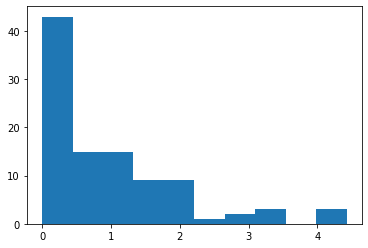

In [38]:
simul_exp = []
for i in range (100):
    simul_exp.append(np.random.exponential())
plt.hist(simul_exp)

### Analyse question 3.4

Ici nous obtenons des distributions différentes, normale puis exponentielle. Elles s'observent directement dans l'histogramme.

> ### 5. 
Simulez dans une variable `simul12`, 12 simulations (1 par ligne) de 1000 tirages d'une loi uniforme
 Utilisez la commande `np.sum` pour avoir une array de 1000 éléments qui somme les 12 tirages. Sauvegarder ce resultat dans une variable `simul_sum`.
    Enfin tracez l'histogramme de `simul_sum`. De quoi s'aperçoit-on. Commentez.

(array([  4.,  15.,  61., 151., 207., 266., 164., 100.,  30.,   2.]),
 array([2.58026808, 3.23555367, 3.89083926, 4.54612485, 5.20141044,
        5.85669603, 6.51198162, 7.16726721, 7.8225528 , 8.47783839,
        9.13312398]),
 <BarContainer object of 10 artists>)

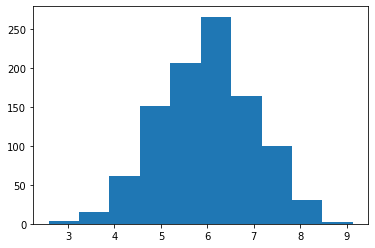

In [39]:
simul12 = []
np.random.seed(4)
for i in range(12):
    simul12.append([])
    for j in range(1000):
        simul12[i].append(np.random.rand())

simul_sum = np.sum(simul12, axis=0)
plt.hist(simul_sum)

### Analyse question 3.5

On observe que la distribution de la somme semble suivre une loi normale, ce qui est normal étant donné le théorème central limite.
Dans le cas spécifique de variables uniformes entre 0 et 1, le théorème central limite énonce que si X1, X2, ..., Xn sont des variables aléatoires indépendantes et identiquement distribuées selon une loi uniforme sur [0,1], alors leur somme S_n = X1 + X2 + ... + Xn suit approximativement une loi normale N(mu, sigma^2) pour n suffisamment grand, où mu = n/2 et sigma^2 = n/12.

> ### 6.
Utilisez la commande `sns.kdeplot`, pour tracer la densité estimée de simul_sum

<AxesSubplot:ylabel='Density'>

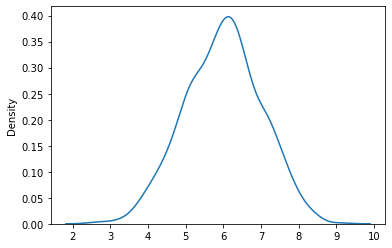

In [40]:
sns.kdeplot(simul_sum)

> ### 7.
Utilisez la commande `stat.ttest_1samp` du module scipy.stats pour faire un test de student de moyenne 6.
Faire de même un test de student de correspondance à une moyenne de 7.
Commentez.

In [41]:
print(stat.ttest_1samp(simul_sum, 6))
print(stat.ttest_1samp(simul_sum, 7))

Ttest_1sampResult(statistic=-0.44387954644254396, pvalue=0.657225797917541)
Ttest_1sampResult(statistic=-31.555614885822145, pvalue=3.470632716455721e-152)


### Analyse question 3.7

Ici la p-value du test de student le nous permet pas d'affirmer que la moyenne vaut 6 mais elle nous permet de réfuter que la moyenne de notre distribution simul_sum vaut 7.

## Exercice 4: Temps d'attente moyen au guichet

On cherche à estimer le temps d’attente moyen au guichet d’une grande banque aux heures de forte affluence.
On a observé 26 clients choisis au hasard et on a obtenu les temps d’attente sauvegardés dans une liste `t_a`.

On suppose que ces temps d'attentes sont distribués normalement et on se demande:

Est-ce qu'on peut rejetter, au risque de 5%, le fait que le temps d'attente au guichet est égal à 4 minutes?

In [42]:
t_a = [6.1, 4.7, 5.6, 4.5, 5.5, 6.8, 2.1, 2.1, 3.5, 2.5, 6.7, 4.4, 4.5, 6.5, 4.9, 3.8, 2.5, 4.0, 6.5, 5.6, 2.7, 3.4, 5.6, 3.5, 4.8, 4.4]

>### 1.
    On pense effectuer un test de Student. Pourquoi est-il approprié ici? Dans quel cas ne serait-il pas?

On applique le test de student pour tester la conformité de la moyenne lorsque la variance est inconue. Ici on nous dit que les temps d'attentes sont distribuées selon une loi normale mais sans nous donner sa variance. On chercher à tester un temps d'attente moyen le test de student est donc pertinant. Si la variance était connue on utiliserait un test fondé sur la loi normale.

>### 2.
Effectuez ce test à l'aide de la fonction `stat.ttest_1samp`.
    Interpretez les résultats.


In [43]:
stat.ttest_1samp(t_a, 4)

Ttest_1sampResult(statistic=1.7891501337389777, pvalue=0.08571467358919063)

Ici la p-value est de 8% donc on ne peut pas rejeter au risque de 5% que la moyenne du temps d'attente vaut 4mn. Mais on ne dit pas quelle vaut 4mn, on sait juste qu'on ne peut pas rejeter le fait quelle soit de 4mn (à 5%).

> ### 3.
On voudrait maintenant tester l'hypothèse que le temps d'attente est supérieur à 4.
    En utilisant l'argument optionnel "alternative" dans la fonction `stat.ttest_1samp`, testez cette hypothèse.
    (lisez la documntation si besoin).
    Commentez.

In [44]:
stat.ttest_1samp(t_a, 4, alternative="greater")

Ttest_1sampResult(statistic=1.7891501337389777, pvalue=0.042857336794595316)

Ici on a une p-value à 4%, on peut donc affirmer, au risque de 5%, que la moyenne n'est pas plus grande que 4mn. Notre temps d'attente vaut donc 4mn ou moins ! Ce test est donc plus précis que le précédent, en effet il est unilatéral !

## Exercice 5: Test de performance.

        Un directeur d'entreprise a fait passer le même test d'aptitude à deux groupes de candidats. Le temps (en minutes) nécessaire à chacun des candidats pour répondre au test sont stocké ci dessous.
        
        Nous supposons que les temps de réponse de chaque groupe sont distribués normalement. Et que les performances des deux groupes sont indépendantes.

In [45]:
time = {"gr1": [8.6, 10.9, 7.3, 9.2, 8.5, 9.2, 9.1, 8.9, 10.7, 8.2, 7.1, 9.4, 8.3, 9.7, 9.2],
       "gr2": [8.3, 7.2, 8.7, 6.7, 10.3, 6.8, 9.8, 8.9, 9.6, 8.6, 6.7, 7.5]}

>### 1. 
    On voudrait tester l'hypothèse que les variances des temps de réponse du groupe 1 et 2 sont identiques.
    Pourquoi le test de Fisher est adapté à cette tache. A combien de degrés de libertés? 

Le test de fisher permet de comparer deux variances en supposant que les deux test sont distribués normalement, il est donc bien adapté à notre cas d'usage. On utilise comme degré de liberté (15-1=) 14 (groupe 1) et (12-1=) 11 (groupe 2).

> ### 2.
    Ce test n'est pas fourni par la bibliothèque scipy. On va donc le coder à la main. 
    Completez le code ci-dessous. 

In [46]:
from scipy.stats import f

var1 = np.var(time["gr1"], ddof=1)
var2 = np.var(time["gr2"], ddof=1)

## Degrés de libertés
d1=len(time["gr1"])-1
d2=len(time["gr2"])-1

## F est notre statistque de test, formés des variables définies au dessus.
F = var1/var2

##Mettez alpha = 0.05 et calculez les quantiles alpha, et 1-alpha de la loi de Fischer correspondante
alpha= 0.05
q1 = f.ppf(alpha, d1, d2)
q2 = f.ppf(1-alpha, d1, d2)

### Test d'hypothèse 
if F<q1 or F > q2:
    print("H_0 est rejetté au risque < 5%")
else:
    print("On ne peut pas rejetter H_0 au risque < 5%")

print("variance empirique du groupe 1 : ", var1)
print("variance empirique du groupe 2 : ", var2)
print("statistique de test : ", F)


On ne peut pas rejetter H_0 au risque < 5%
variance empirique du groupe 1 :  1.0926666666666667
variance empirique du groupe 2 :  1.6135606060606065
statistique de test :  0.6771773322691205


> ### 4.
    Pourquoi a-t-on mis ddof=1 dans les calculs de la variance?

Le paramètre ddof=1 modifie le diviseur de la somme des carrés des échantillons moins la moyenne. Il permet donc de corriger le biais de l'estimateur empirique de la variance.

> ### 5.
    En utilisant la fonction f.cdf et la statistique F calculée à la question précédente. Calculez la p value du test.

In [47]:
p_value=f.cdf(F, d1,d2)
print("On obtient une p-value : ", p_value)

On obtient une p-value :  0.24299929271157222


> ### 6.  
 Si la performance des candidats des deux sexes lors du test n’est évaluée que par le temps nécessaire
    pour y répondre, peut-on affirmer qu’il y a une différence réelle entre la performance moyenne des
    candidats et celle des candidates ? 
 En utilisant `stat.ttest_ind` effectuez le test correspondant et justifiez le choix de ce test.

In [48]:
stat.ttest_ind(time["gr1"], time["gr2"])

Ttest_indResult(statistic=1.560797082654693, pvalue=0.13114259380475782)

>#### Question 6

On obtient ici une p-value de 13% ! Cela n'est pas suffisant pour rejetter l'hypothèse que les deux moyennes de temps sont identiques.

## Exercice 6. Test d'adéquation à une loi

Le fichier des.csv (csv des) contient 1200 réalisation d'un lancé de dès. Importez le avec la fonction `pd.read_csv`.
    
>### 1.
On voudrait tester l'hypothèse que le dè n'est pas truqué. Quel test choisir? Effectuez le test avec la fonction du module `scipy.stats` (importé `stat` précédemment) correspondante.
indice: utilisez la fonction `np.unique()` pour calculez les fréquences d'apparitions.

>### On pose l'hypothèse H0 : le dé n'est pas truqué.
>on peut utiliser le test du Chi². Ce test permet de déterminer si les fréquences observées d'un échantillon sont significativement différentes des fréquences attendues (ici celle d'un dé non truqué).

In [49]:
# On commence par charger le fichier
df= pd.read_csv("des.csv")
df.columns = ["résultat"]
# Passage sous forme de liste
faces_obtenues = df["résultat"].tolist()

In [50]:
# On récupère la fréquence pour chaque faces dans le cadre du dé que l'on étudie
freq_de_etudie = np.unique(faces_obtenues, return_counts=True)[1]
# Ici pour un dé non truqué à 6 face, il faut donc une fréquence d'apparition de 1/6
freq_theorique = np.ones(6) / 6  # fréquences théoriques si le dé est équitable [1/6, 1/6, .., 1/6]

In [51]:
# Nous pouvons utiliser la fonction stat.chisquare() pour effectuer le test du Chi² :
statistique, p_value = stat.chisquare(freq_de_etudie, freq_theorique * np.sum(freq_de_etudie))

print("Statistique du test du Chi-deux : ", statistique)
print("p-valeur : ", p_value)

Statistique du test du Chi-deux :  2.0358632193494577
p-valeur :  0.8441607579169912


> La p-valeur obtenue est de 0.844, ce qui est supérieur au niveau de significativité communément choisi de 5%. On ne peut donc pas rejeter l'hypothèse H0 selon laquelle le dé n'est pas truqué.

> ### 2.
 Effectuez le test d'adéquation à la loi qui donne 1/6 de probabilité d'apparition au chiffres 1,3,4,6; 1/12 au chiffre 2 et 1/4 au chiffre 5.

> Pour effectuer un test d'adéquation à une loi donnée, on peut utiliser le test de Kolmogorov-Smirnov (KS). Ce test permet de déterminer si un échantillon suit une distribution donnée ou non.

Dans ce cas, la distribution est donnée par les probabilités suivantes :

- 1, 3, 4, 6 ont une probabilité de 1/6 chacun
- 2 a une probabilité de 1/12
- 5 a une probabilité de 1/4

In [52]:
xk = np.arange(1, 7)
pk = [1/6, 1/12, 1/6, 1/6, 1/4, 1/6]

distribution_theorique = stat.rv_discrete(name='distribution_theorique', values=(xk, pk))

In [53]:
# Ici, la fonction cdf de la distribution théorique renvoie la fonction de répartition cumulative (cumulative distribution function, CDF) associée à la distribution. Cette fonction est utilisée pour calculer la statistique de test dans le test de Kolmogorov-Smirnov.
statistique, p_value = stat.kstest(faces_obtenues, distribution_theorique.cdf)

print("Statistique du test de Kolmogorov-Smirnov : ", statistique)
print("p-value : ", p_value)

Statistique du test de Kolmogorov-Smirnov :  0.17111481790380867
p-value :  3.644203046746457e-31


On obtient donc une p-value plus petite que 0.05 (5%) on peut donc rejetter l'hypothèse que notre dé suive la loi de probabilité donnée.

## Exercice 7.  Tests d'indépendance

>### 1.
   Importez le fichier `hsb2.csv` dans une dataframe. Affichez les première lignes.

In [54]:
df=pd.read_csv("hsb2.csv")
df.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


dans la suite on choisira un test adapté pour répondre aux questions posées

>### 2.
    Le sexe des lycéens influence-t-il le type d'établissement fréquenté?


In [55]:
contingency_table = pd.crosstab(df['gender'], df['schtyp'])
contingency_table

schtyp,private,public
gender,,
female,18,91
male,14,77


In [56]:
# Test d'indépendance du chi²
chi2, p_value, dof, expected = stat.chi2_contingency(contingency_table)

# Afficher les résultats
print("Test d'indépendance du chi-carré")
print("Statistique de test :", chi2)
print("P-valeur :", p_value)
print("Nombre de degrés de liberté :", dof)
print("Tableau des fréquences attendues :", expected)

Test d'indépendance du chi-carré
Statistique de test : 0.0005400890066683009
P-valeur : 0.9814589793042314
Nombre de degrés de liberté : 1
Tableau des fréquences attendues : [[17.44 91.56]
 [14.56 76.44]]


On obtient ici une p-value > 5% donc on ne peut pas rejeter l'hypothèse d'indépendance.

> ### 3.
    Pourquoi il n'est pas très judicieux d'effectuer un test similaire pour tester l'indépendance entre le statut social (varible "ses") et l'ethnie?
    indice: faites afficher le tableau de contingence pour ces variables.

On a ici des variables qui sont quantitatives et non qualitatives, le test du Chi² n'est donc pas judicieux

In [57]:
contingency_table = pd.crosstab(df['ses'], df['race'])
contingency_table

race,african american,asian,hispanic,white
ses,,,,
high,3,3,4,48
low,11,3,9,24
middle,6,5,11,73


Le tableau de contingence nous indique que le nombre d'individus dans certaines catégories est limité, ce qui pourrait compromettre la validité du test du Chi².

> ### 4. 
    Proposez une méthode de modification de données pour tester tout de même l'indépendance. Effectuez le test correspondant.

Pour réaliser ce test, on va mapper les différentes catégories vers des chiffres ici low->1, middle->3 et high->3

In [58]:
# On utilise un mapping pour obtenir une valeur numérique au lieu des "low", "middle", "high"
mapping = {"low": 1, "middle": 2, "high": 3}
df['ses_num'] = df['ses'].map(mapping)

# Tableau de contingence
table = pd.crosstab(df['ses_num'], df['race'])

# Test du Chi²
chi2, pval, dof, expected = stat.chi2_contingency(table)

print("On obtient comme résultat :")
print("Chi² = {}, p-value = {}".format(chi2, pval))

On obtient comme résultat :
Chi² = 18.515950516774737, p-value = 0.0050642308532138506


P-valeur < 5% donc on peut rejeter l'hypothèse d'indépendance et admettre qu'il y a dépendance entre la classe socio-économique et l'ethnie